# Case Study: Erweiterung des Süßwarensortiments (Eigenmarke)
## Szenario

* Der Einkauf von Lidl möchte das Süßwarensortiment (Eigenmarke) erweitern. Hierzu soll eine neue Süßigkeit kreiert werden. Jedoch besteht innerhalb des betreffenden Projektteams noch Uneinigkeit über die Charakteristika der neuen Süßigkeit. 
* Während die Einen beispielsweise eine Keks-basierte Süßigkeit bevorzugen, favorisieren Andere eine Fruchtgummivariation. Daher hat der Bereichsvorstand beschlossen ein Marktforschungsunternehmen zu beauftragen, um die Beliebtheit, der am Markt erhältlichen Süßwaren, zu ermitteln. 
* Die Ergebnisse der Marktforschung liegen nun vor und Sie wurden beauftragt eine Analyse der Daten durchzuführen. 

* Ziel ist es, die Auswirkung der **Charakteristika von Süßwaren** auf deren **Beliebtheit** zu analysieren und auf Basis dieser Analyse eine **Empfehlung für die neue Süßigkeit** abzugeben.

## Datensatz

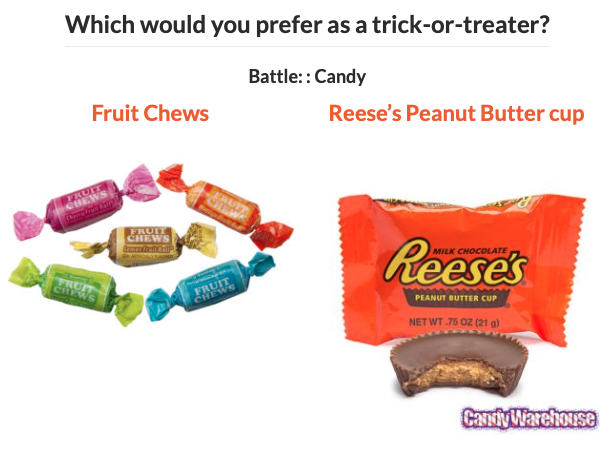

* Der Datensatz

| Header    | Description |
|-----------|-------------|
| chocolate | Enthält es Schokolade?            |
| fruity    | Ist es Fruchtgeschmack?            |
| caramel   | Enthält es Karamell           |
| peanutalmondy   | Enthält es Erdnussbutter oder Mandeln?            |
| nougat   | Enthält es Nougat?            |
| crispedricewafer   | Enthält es knusprigen Reis, Waffel oder Keks?            |
| hard   | Ist es ein Bonbon (d.h., Zucker und Maissirup, gekocht ohne zu kristalllisieren)            |
| bar   | Ist es ein Schokoriegel?            |
| pluribus   | Ist es eine von mehreren Süßigkeiten in einer Tüte oder Schachtel?            |
| sugarpercent   | Das Zuckerperzentil, unter das es innerhalb des Datensatzes fällt.            |
| pricepercent   | Das Perzentil des Stückpreises im Vergleich zum Rest des Datensatzes.            |
| winpercent   | Der Gewinnprozentsatz nach 269.000 Paarungen            |

In [1]:
# update matplotlib and restart
!pip install --upgrade matplotlib==3.5.1

     |████████████████████████████████| 11.2 MB 4.3 MB/s 
     |████████████████████████████████| 895 kB 44.4 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [1]:
import matplotlib
print(matplotlib.__version__)

3.5.1


In [2]:
# import libraries

import numpy as np 
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')


import warnings
warnings.filterwarnings("ignore")

In [3]:
# import files from Google Drive in Colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
%cd gdrive/My Drive/Colab Notebooks/Lidl Analytics
!ls

/content/gdrive/My Drive/Colab Notebooks/Lidl Analytics
 candy-data.csv
'Final Lidl Analytics – Analytics Consulting Case Study (Deutsch).ipynb'
'Lidl Analytics – Analytics Consulting Case Study (Deutsch).ipynb'
'Lidl Analytics – Analytics Consulting Case Study.ipynb'


In [5]:
# read the CSV file 
df = pd.read_csv('candy-data.csv')

# correct the apostrophe in competitorname
df['competitorname'] = df['competitorname'].apply(lambda s: s.replace("Õ", "'"))

In [6]:
# read the first 5 rows in the DataFrame
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [7]:
# shape of the DataFrame
df.shape

(85, 13)

In [8]:
# data types of the various columns
df.dtypes

competitorname       object
chocolate             int64
fruity                int64
caramel               int64
peanutyalmondy        int64
nougat                int64
crispedricewafer      int64
hard                  int64
bar                   int64
pluribus              int64
sugarpercent        float64
pricepercent        float64
winpercent          float64
dtype: object

* Der Datensatz ist eine Kombination **kategorische** (`object`) und **numerisch** (`int64` und `float64`)

In [9]:
# number of occurrences
df[df.columns[1:10]].sum()

chocolate           37
fruity              38
caramel             14
peanutyalmondy      14
nougat               7
crispedricewafer     7
hard                15
bar                 21
pluribus            44
dtype: int64

## Wie oft hat eine Süßigkeit gegen den Rest gewonnen?

In [10]:
# sort the dataframe and find the top 10
sorted = df.sort_values(by='winpercent', ascending=False)#[:10]
top10 = sorted[:10]
top10

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
52,Reese's Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
51,Reese's Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
79,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
28,Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
64,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782
53,Reese's pieces,1,0,0,1,0,0,0,0,1,0.406,0.651,73.434990
36,Milky Way,1,0,1,0,1,0,0,1,0,0.604,0.651,73.099556
54,Reese's stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901
32,Peanut butter M&M's,1,0,0,1,0,0,0,0,1,0.825,0.651,71.465050
42,Nestle Butterfinger,1,0,0,1,0,0,0,1,0,0.604,0.767,70.735641


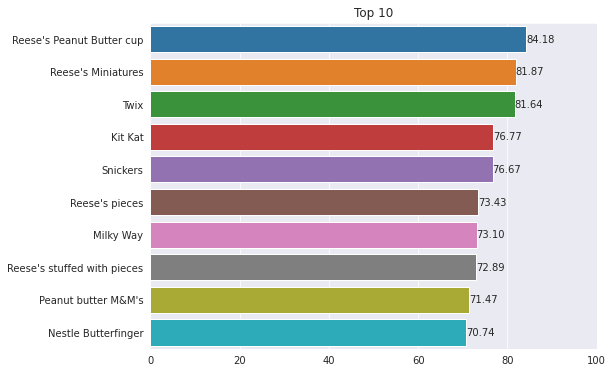

In [11]:
# top 10 in a horizontal bar graph 

fig, ax = plt.subplots(figsize=(8,6))
ax = sns.barplot(x='winpercent', y='competitorname', data=top10,
            orient='h')
ax.set_ylabel('')    
ax.set_xlabel('')
ax.set_xlim(0,100)
plt.title('Top 10')
ax.bar_label(ax.containers[0], fmt= '%0.2f' )
plt.show()

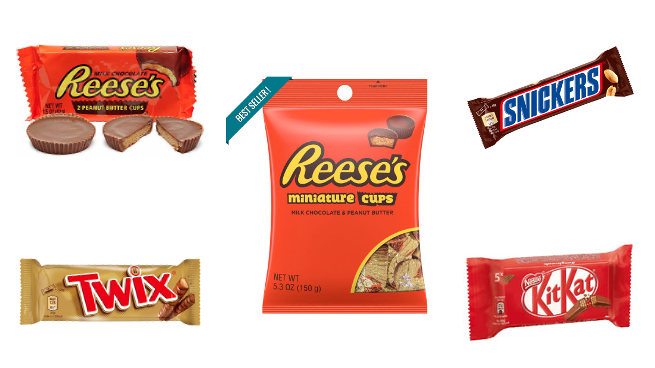

* Reese’s Peanut Butter Cups und seine Varianten machen vier der Top 10 Plätze aus.
* Die beliebesten Süßigkeiten sind Shoko-basiert.

In [12]:
# least favourite candies
sorted[-5:]

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
26,Jawbusters,0,1,0,0,0,0,1,0,1,0.093,0.511,28.127439
72,Super Bubble,0,1,0,0,0,0,0,0,0,0.162,0.116,27.303865
12,Chiclets,0,1,0,0,0,0,0,0,1,0.046,0.325,24.524988
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824
44,Nik L Nip,0,1,0,0,0,0,0,0,1,0.197,0.976,22.445341


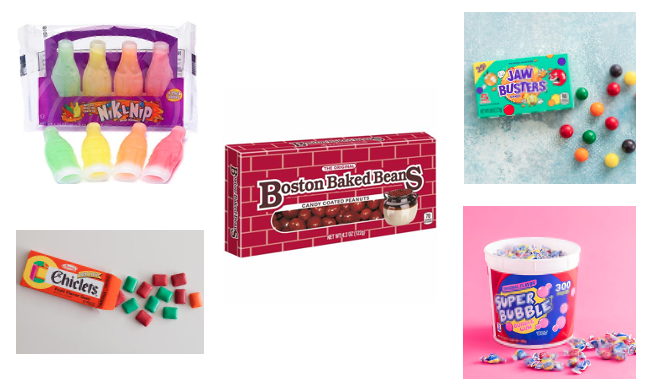

* Die am wenigsten beliebten Süßigkeiten sind Nik L Nip, Boston Baked Beans und Chiclets.
* Es ist ja ganz klar, dass die meisten mit Fruchtgeschmack und in einer Verpackung verpackt sind.

## Wie sind die Merkmale korreliert?

* Es ist ja kein Wunder, dass einige der Merklmale miteinander korrelieren sollen. Zum Beispiel passen Karamell und Fruchtgeschmack nicht zusammen. Zudem sollte Nougat dem Schokoladengeschmack nicht negative beeinflussen (bspw. Snickers). Diese Beziehungen zwischen verschieden Merkmalen können anhand von Korrelationsmatrix dargestellt werden.
* Die **Korrelationsmatrix** ist eine Tabelle, in der die Variablen sowohl in Zeilen als auch in Spalten angezeigt werden und die Zellenwerte die Korrelation (z. B. Pearson's R, Spearman's Rho oder Kendall's Tau) zwischen den Variablen sind. In unserem Fall verwenden wir den Pearson-Korrelationskoeffizient, damit wir zwei Stichproben mit/ohne ein Merkmal vergleichen können.

* Der Pearson-Korrelationskoeffizient ist eine Metrik, die misst, inwieweit numerische Variablen miteinander assoziiert sind.
Der Korrelationskoeffizient liegt immer zwischen +1 (perfekte positive Korrelation) und -1 (perfekte negative Korrelation); 0 zeigt keine Korrelation an.

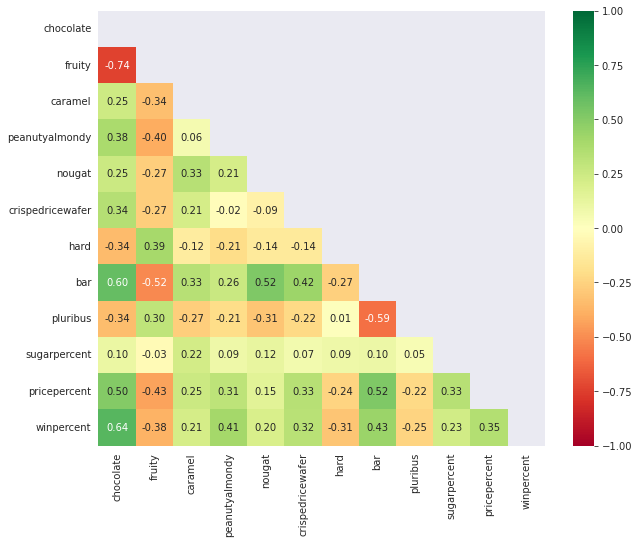

In [13]:
# correlation matrix (a.k.a, Heatmap)
fig, ax = plt.subplots(figsize=(10,8))
corr= df.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)
sns.heatmap(df.corr(), vmin=-1.0, vmax=1.0, annot= True, fmt="0.2f", 
           cmap='RdYlGn', mask=matrix)
plt.show()

Bemerkungen:

* Hersteller mischen Schokolade und Fruchtgeschmack meistens nicht. d.h., Schokolade findet man normalerweise nicht in Fruchtvariation Süßigkeiten.
* Schokolade führt zu einem hohen Gewinnprozentsatz, gefolgt von einer Riegelsüßigkeit und Penaut Butter/Mandeln.
* Süßigkeiten, die als Riegel geformt sind, haben im Allgemeinen Schokolade oder Nougat.
* schoko- und nougatbasierte Süßigkeiten werden nicht häufig in einer Tüte verpackt werden.
* Verglichen mit den anderen Süßigkeiten ist das Fruchtgeschmack in Bonbons (hard candies) verwendet.
* Zucker ist nicht streng mit dem Gewinn verbunden. Zuckeranalyse wird ausgeschlossen, sodass wir uns auf die Hauptmerkmale fokussieren können.
* Da die Befragten für die Süßigkeiten nicht bezahlen mussten, ist es nicht verwunderlich, dass der Einfluss des Preises gering ist. Deswegen wird der Effekt von Preis in der weiteren Analyse vernachlässigt.

Korrelationskoeffizient nach Pearson für `winpercent`

In [14]:
win_corr = df.corr().loc['winpercent', df.columns[1:10]].sort_values()
win_corr

fruity             -0.380938
hard               -0.310382
pluribus           -0.247448
nougat              0.199375
caramel             0.213416
crispedricewafer    0.324680
peanutyalmondy      0.406192
bar                 0.429929
chocolate           0.636517
Name: winpercent, dtype: float64

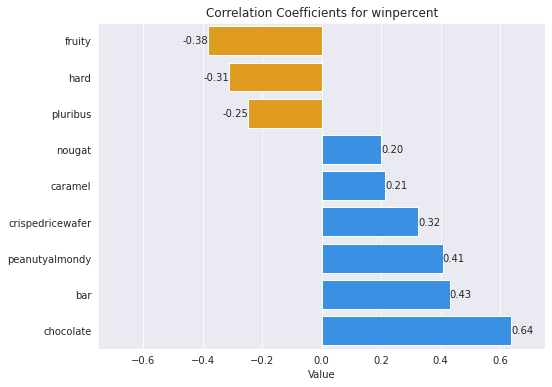

In [15]:
color = ['orange','orange','orange','dodgerblue','dodgerblue',
         'dodgerblue','dodgerblue','dodgerblue','dodgerblue']


fig, ax = plt.subplots(figsize=(8,6))
ax = sns.barplot(win_corr.values,win_corr.index, orient='h', palette=color) 
ax.set_ylabel('')    
ax.set_xlabel('Value')
ax.set_xlim(-0.75,+0.75)
plt.title('Correlation Coefficients for winpercent')
ax.bar_label(ax.containers[0], fmt= '%0.2f', label_type='edge' )

plt.show()

## Merkmalsanalyse

In [16]:
# plot function
forms = ['hard', 'bar', 'pluribus', 'fruity']

def explore(df, feature, title):
    plt.subplots(1,2,figsize=(8,5))

    if feature in forms:
      plt.subplot(1,2,1)
      plt.title(f"Is it a {title}?",fontsize=10)
      sns.violinplot(data=df ,x=feature,y="winpercent")
      plt.xlabel("")
     
      plt.subplot(1,2,2)
      plt.title(f"Total percentage of {title} Candies",fontsize=10)
      plt.pie(df[feature].value_counts(), autopct="%1.1f%%",
            labels=[f"non-{title} Candy", f"{title} Candy"],
            labeldistance=1.1, explode=[0,0.05])
      plt.axis('equal')
      plt.tight_layout()


    else:
      plt.subplot(1,2,1)
      plt.title(f"Does it contain {title}?",fontsize=10)
      sns.violinplot(data=df ,x=feature,y="winpercent")
      plt.xlabel("")

      plt.subplot(1,2,2) 
      plt.title(f"Total percentage of Candies with and without {title}",fontsize=10)
      plt.pie(df[feature].value_counts(), autopct="%1.1f%%",
            labels=[f"Doesn't contain {title}", f"Contain {title}"],
            labeldistance=1.1, explode=[0,0.05])
      plt.axis('equal')
      plt.tight_layout()
    
    plt.show()

**Ist das Unterschied statistisch signifikant?**

* Hier möchten wir testen, ob sich die Mittelwerte des Gewinnprozentsatzs zweier Stichproben (bspw. mit/ohne Karamell) voneinander unterscheiden, deswegen wird t-Test verwendet.

In [17]:
# function for t-test 
def significance(df, feature, y, alpha):
  p = stats.ttest_ind(df[df[feature] == 0][y], 
                  df[df[feature] == 1][y])[1] # return only p-value
                                              # P-value answer the following question: Given a chance model, 
                                              # .. what is the probability of a result this extreme?
  print(f'p-value: {p:10f}')
  if p < alpha:
    print('\nThe difference is statistically significant. \nThe chance is not blame!')
  else:
    print(f'\nThe difference is statistically NOT significant')

### `chocolate`

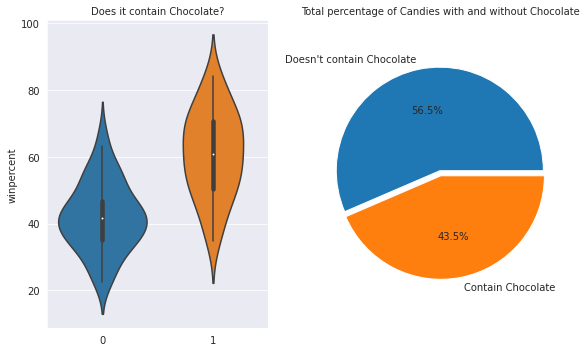

In [18]:
explore(df, 'chocolate', 'Chocolate')

Ist der Unterschied zwischen Süßigkeiten (mit/ohne Schokolade) in Bezug auf den Gewinnprozentsatz statistisch signifikant?

In [19]:
significance(df, 'chocolate', 'winpercent', 0.05)

p-value:   0.000000

The difference is statistically significant. 
The chance is not blame!


Der P-Wert ist $\approx0$  , was bedeutet, dass wir **NICHT** erwarten würden, ein so extremes Ergebnis wie dieses oder ein extremeres Ergebnis zufällig zu erzielen. 

* Schokolade ist der Schlüssel zum Sieg 
* Fast die Hälfte aller Süßigkeiten enthält Schokolade
  * 43% der Süßigkeiten enthalten Schokolade
  * 90% der Top 20 Süßigkeiten enthalten Schokolade (100% der Top 10)

In [20]:
sorted['chocolate'][:20].value_counts()#/20

1    18
0     2
Name: chocolate, dtype: int64

* **Ergebnis**: Schokolade ist ein MUSS!

### `fruity`

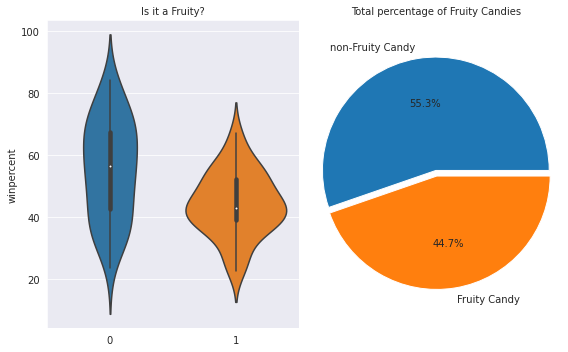

In [21]:
explore(df, 'fruity', 'Fruity')

Ist die Unterschied zwischen Süßigkeiten (mit/ohne Fruchtgeschmack) statistisch signifikant?

In [22]:
significance(df, 'fruity', 'winpercent', 0.05)

p-value:   0.000322

The difference is statistically significant. 
The chance is not blame!


* Es ist sehr üblich, Fruchtgeschmack zu verwenden (44.7%). 
* Dies bedeutet jedoch NICHT, dass Süßigkeiten mit Fruchtgeschmack zum Gewinnen führen.
* Mit Fruchtgeschmack haben keine Süßwaren mehr als 80% Gewinn geschafft.

Aus HeatMap: Fruchtgeschmack und Schoko Süßigkeiten sind negativ korreliert. Wie häufig sind die beiden zusammen gemischt?

In [23]:
df[['competitorname', 'chocolate', 'fruity']].groupby(['chocolate', 'fruity'], 
                                                      as_index=False).count()

,chocolate,fruity,competitorname
0,0,0,11
1,0,1,37
2,1,0,36
3,1,1,1


* Fruchtgeschmack und Schokolade sind nur einmal zusammen gemischt
* **Ergebnis**: Fruchtgeschmack muss ausgeschlossen werden.

### `caramel`

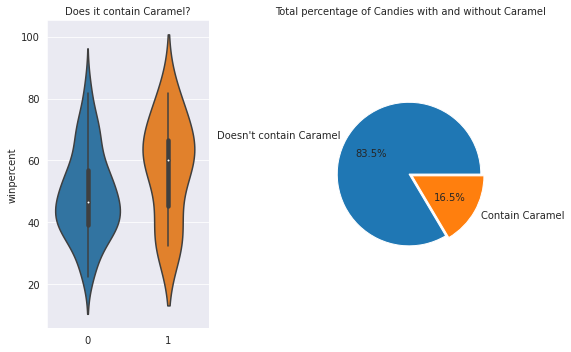

In [24]:
explore(df, 'caramel', 'Caramel')

Ist der Unterschied statistisch signifikant?

In [25]:
significance(df, 'caramel', 'winpercent', 0.05)

p-value:   0.049864

The difference is statistically significant. 
The chance is not blame!


* Süßigkeiten, die Karamell enthalten, haben bessere Performanz als Süßigkeiten ohne Karamell
* Obwohl Karamell nicht so häufig im Markt ist, aber es hat einen positiven Einfluss auf den Gewinn
* Das Effekt ist statistisch Signifikant! **ABER** das beduetet nicht unbedingt ein praktisch Signifikanz (Wegen der niederigen Anzahl der Beobachtungen)

Eine weitere Analyse für die Beziehung zwischen Schokolade und Karamell kann hier hilfreich sein.

* Die meisten der Süßigkeiten mit Karamell enthalten auch Schokolade (ca. 71%):

In [26]:
df[['chocolate', 'caramel', 'competitorname']].groupby(['chocolate', 'caramel'], 
                                                              as_index=False).count()

,chocolate,caramel,competitorname
0,0,0,44
1,0,1,4
2,1,0,27
3,1,1,10



* Darüber hinaus beinhalten 3 der Top 10 Süßigkeiten sowohl Karamell als auch Schokolade!

In [27]:
top10[['chocolate', 'caramel', 'competitorname']].groupby(['chocolate', 'caramel'], 
                                                              as_index=False).count()

,chocolate,caramel,competitorname
0,1,0,7
1,1,1,3


Wir überprüfen die Wirkung der Zugabe von Karamell zur schokobasierten Süßigkeiten:

<AxesSubplot:xlabel='caramel', ylabel='winpercent'>

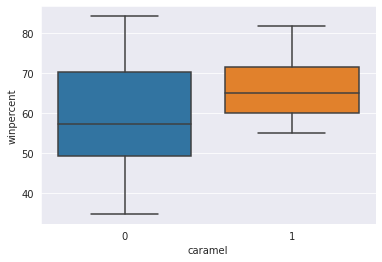

In [28]:
plt.figure()
sns.boxplot(data=df[df['chocolate'] == 1], x="caramel", y="winpercent")

In [29]:
p_value = stats.ttest_ind(df[(df['caramel'] == 0) & (df['chocolate'] == 1)]['winpercent'], 
                                                  df[(df['caramel'] == 1) & (df['chocolate'] == 1)]['winpercent'])[1]
print(f'p-value: {p_value:4f}')

p-value: 0.138442


* Karamell mit Schokolade zeigen eine gute Performance zusammen. 
* Der Unterschied ist jedoch statistisch NICHT signifikant. -> zufälliger Zufall könnte für den beobachteten Effekt verantwortlich sein. (aufgrund der geringen Anzahl von Beobachtungen)

**Ergebnis**: Karamell kann hilfreich sein!

### `peanutalmondy`

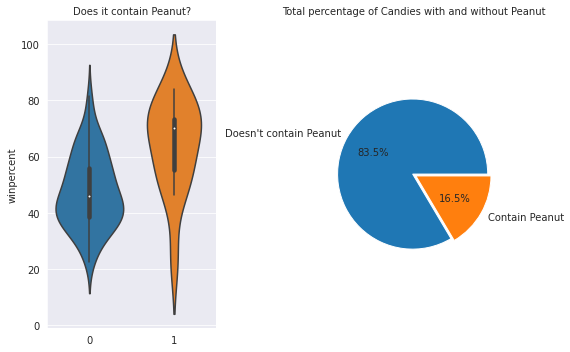

In [30]:
explore(df, 'peanutyalmondy', 'Peanut')

In [31]:
significance(df, 'peanutyalmondy', 'winpercent', 0.05)

p-value:   0.000115

The difference is statistically significant. 
The chance is not blame!


* Erdnussbutter ist auch der Schlüssel zum Gewinnen (wie Schokolade)
* Man kann deutlich sehen, dass Erdnussbutter im Market nicht sehr häufig ist.

Da Schoko und Erdnussbutter positiv korreliert sind, überprüfen wir, wie häufig die beiden Komponente zusammen gemischt sind:

In [32]:
# check the dataset
df[['chocolate', 'peanutyalmondy', 'competitorname']].groupby(['chocolate', 'peanutyalmondy'], 
                                                              as_index=False).count()

,chocolate,peanutyalmondy,competitorname
0,0,0,46
1,0,1,2
2,1,0,25
3,1,1,12


* Die meisten Süßigkeiten, die Erdnussbutter enthalten, enthalten auch Schokolade (85%).

In [33]:
# check top 10
top10[['competitorname', 'chocolate', 'peanutyalmondy']].groupby(['chocolate', 'peanutyalmondy'], 
                                                      as_index=False).count()

,chocolate,peanutyalmondy,competitorname
0,1,0,3
1,1,1,7


* Zudem beinhalten die meisten der Top 10 Süßigkeiten sowohl Schokolade als auch Erdnussbutter!


Wir überprüfen die Wirkung der Zugabe von Erdnussbutter auf die schokobasieten Süßigkeiten:

<AxesSubplot:xlabel='peanutyalmondy', ylabel='winpercent'>

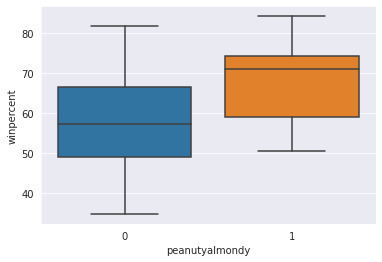

In [34]:
plt.figure()
sns.boxplot(data=df[df['chocolate'] == 1], x="peanutyalmondy", y="winpercent")

* Süßigkeiten, die Schokolade und Erdnussbutter enthalten, haben einen höheren Gewinnprozentsatz!

Könnte der Zufall für diesen beobachteten Effekt verantwortlich sein? -> Berechnen wir den P-Wert:

In [35]:
p_value = stats.ttest_ind(df[(df['peanutyalmondy'] == 0) & (df['chocolate'] == 1)]['winpercent'], 
                                                  df[(df['peanutyalmondy'] == 1) & (df['chocolate'] == 1)]['winpercent'])[1]
print(f'p-value: {p_value:4f}')

p-value: 0.010503


* p-Wert $< 0.05$ Das heißt, der Zufall ist nicht verantwortlich.
* **Ergebnis**: Schokolade und Erdnussbutter passen sehr gut zusammen. Sie müssen zusammen gemischet werden!

### `nougat`

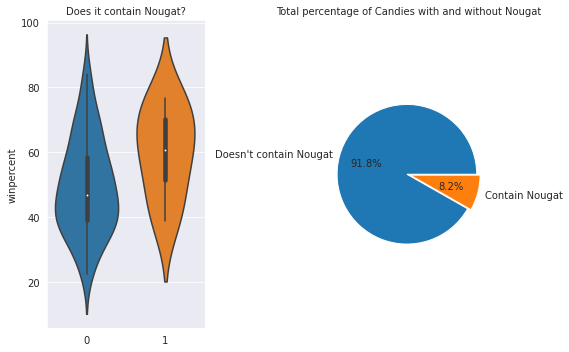

In [36]:
explore(df, 'nougat', 'Nougat')

Ist das Unterschied statistisch signifikant?

In [37]:
significance(df, 'nougat', 'winpercent', 0.05)

p-value:   0.067348

The difference is statistically NOT significant


* Süßigkeiten mit Nougat machen nur 8% der Bonbons aus (nicht beliebt).
* Nougat wirkt sich positiv auf den Gesamtgewinnprozentsatz aus.
* Der Effekt ist jedoch statistisch NICHT signifikant!. (The chance is to blame).


**Ergebnis**: Nougat wird ausgeschlossen. 

### `crispedricewafer`

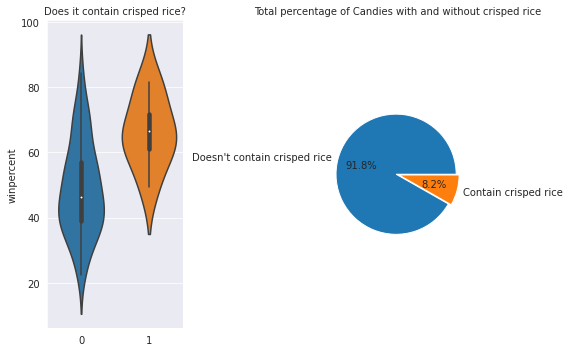

In [38]:
explore(df, 'crispedricewafer', 'crisped rice')

Ist die Unterschied statistisch Signifikant?

In [39]:
significance(df, 'crispedricewafer', 'winpercent', 0.05)

p-value:   0.002432

The difference is statistically significant. 
The chance is not blame!


* Ähnlich wie Nougat machen Süßigkeiten mit knusprigem Reis/Waffeln/einer Kekskomponente ca. 8% der Süßigkeiten aus (nicht beliebt).
* Eine Komponente aus knusprigen Reis/Waffeln/Keksen wirkt sich positiv auf den Gesamtgewinnprozentsatz aus. Mit abnehmender Stichprobengröße nimmt jedoch der Einfluss zufälliger Fehler zu.
* Mit anderen Worten, selbst wenn ein Ergebnis statistisch signifikant ist, bedeutet das NICHT unbedingt, dass es praktische Signifikanz hat!

**Ergebnis**: Süßigeited mit knusprigem Reis/Waffeln/einer Kekskomponente werden ausgeschlossen!

### `hard`

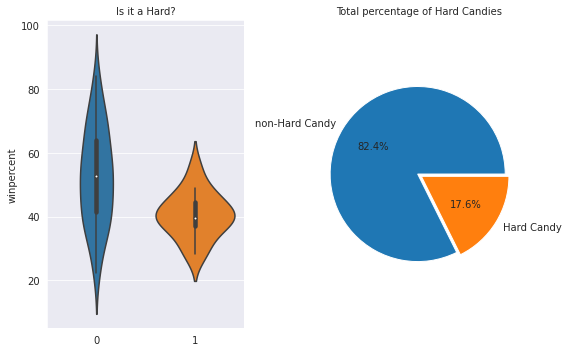

In [40]:
explore(df, 'hard', 'Hard')

Ist die Unterschied statistisch signifikant?

In [41]:
significance(df, 'hard', 'winpercent', 0.05)

p-value:   0.003841

The difference is statistically significant. 
The chance is not blame!


* Bonbons wirken sich negativ auf das Gewinn aus.
* Sie machen 17% der Süßigkeiten aus.
* Nur 1 Bonbon enthält Schokolade!

In [42]:
df[['hard', 'chocolate', 'competitorname']].groupby(['chocolate', 'hard'],
                                                    as_index=False).count()

,chocolate,hard,competitorname
0,0,0,34
1,0,1,14
2,1,0,36
3,1,1,1


Frage: Haben Bonbons OHNE Schokolade einen positiven Einfluss auf den Gewinn?

<AxesSubplot:xlabel='hard', ylabel='winpercent'>

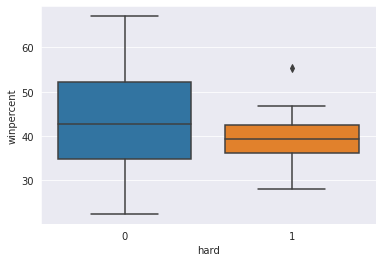

In [43]:
plt.figure()
sns.boxplot(data=df[df['chocolate'] == 0], x="hard", y="winpercent")

* Dabei spielt es keine Rolle, ob die Bonbons ohne Schokolade hart oder weich sind.
* **Ergebnis**: Bonbons werden ausgechlossen!

### `bar`

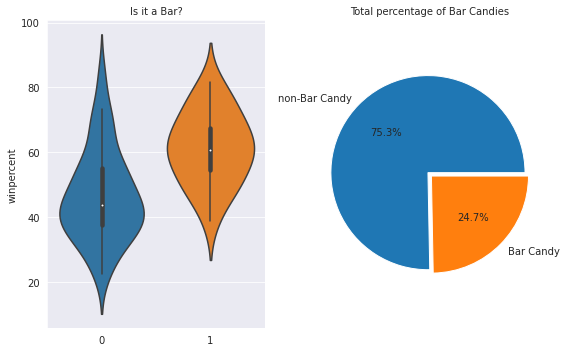

In [44]:
explore(df, 'bar', 'Bar')

In [45]:
significance(df, 'bar', 'winpercent', 0.05)

p-value:   0.000040

The difference is statistically significant. 
The chance is not blame!


* Süßwaren in Riegelform machen fast ein Viertel der Süßigkeiten aus und werden im Vergleich mit den non-Riegel Süßigkeiten bevorzugt.

Eine weitere Analyse für die Beziehung zwischen Schokolade und Riegelform kann hier hilfreich sein.

In [46]:
df[['bar', 'chocolate', 'competitorname']].groupby(['chocolate', 'bar'],
                                                    as_index=False).count()

,chocolate,bar,competitorname
0,0,0,47
1,0,1,1
2,1,0,17
3,1,1,20


* Nur 1 Riegel beinhaltet **keine** Schokolade!

Deswegen überprüfen wir, ob Shokoriegeln einen positiven Einfluss auf den Gewinn haben:

<AxesSubplot:xlabel='bar', ylabel='winpercent'>

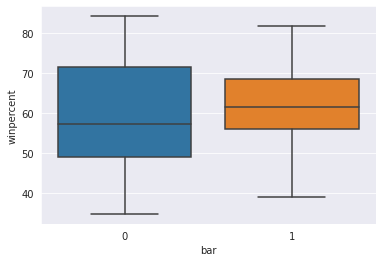

In [47]:
plt.figure()
sns.boxplot(data=df[df['chocolate'] == 1], x="bar", y="winpercent")

In [48]:
p_bar = stats.ttest_ind(df[(df['bar'] == 0) & (df['chocolate'] == 1)]['winpercent'], 
                                                  df[(df['bar'] == 1) & (df['chocolate'] == 1)]['winpercent'])[1]
print(f'p-value: {p_bar:4f}')   
                                        

p-value: 0.570078


* Es gibt ja einen leicht positiven Einfluss auf den Gewinn. Die Unterschied ist jedoch statistish nicht signifikant! 
* Süßwaren in Riegelform mit Schokolade sind NICHT unbedingt besser als solche ohne Schokolade
* **Ergebnis**: Riegelform ist häufig aber ist es kein MUSS!

### `pluribus`

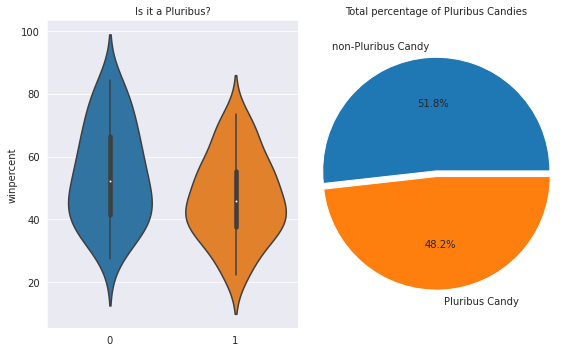

In [49]:
explore(df, 'pluribus', 'Pluribus')

In [50]:
significance(df, 'pluribus', 'winpercent', 0.05)

p-value:   0.022418

The difference is statistically significant. 
The chance is not blame!


* Süßigkeiten im Einzelnen haben eine etwas bessere Performanz als die von vielen in einer Tüte oder Schachtel.

Eine weitere Analye der Beziehung mit Schokolade kann hier hilfreich sein.

In [51]:
# check the dataset
df[['chocolate', 'pluribus', 'competitorname']].groupby(['chocolate', 'pluribus'], 
                                                              as_index=False).count()

,chocolate,pluribus,competitorname
0,0,0,16
1,0,1,32
2,1,0,25
3,1,1,12


* Nur 27% der Süßwaren in Pluribusform (M&M's, Smarties...) beinhalten Schokolade

Frage: Schokolade im Pluribus form oder nicht?

<AxesSubplot:xlabel='pluribus', ylabel='winpercent'>

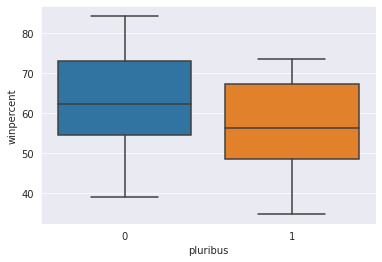

In [52]:
plt.figure()
sns.boxplot(data=df[df['chocolate'] == 1], x="pluribus", y="winpercent")

In [53]:
p_value = stats.ttest_ind(df[(df['pluribus'] == 0) & (df['chocolate'] == 1)]['winpercent'], 
                                                  df[(df['pluribus'] == 1) & (df['chocolate'] == 1)]['winpercent'])[1]
print(f'p-value: {p_value:4f}')

p-value: 0.184196


In [60]:
df[(df['pluribus'] == 1) & (df['chocolate'] == 1)]['winpercent'].sort_values(ascending=False)

53    73.434990
32    71.465050
47    69.483788
33    66.574585
56    65.716286
27    57.219250
22    55.375454
35    55.064072
84    49.524113
76    45.736748
62    37.887188
59    34.722000
Name: winpercent, dtype: float64

* Die Wirkung ist negativ. Sie ist jedoch statistisch nicht signifikant
* Nur 2 schokobasierte Süßigkeiten im Pluribusform haben mehr als 70% erreicht
* **Ergebnis**: Süßwaren in Pluribusform sind ausgeschlossen!

## Result:

Die beste Kombination besteht aus **Schokolade**, **Erdnussbutter**, und vielleicht **Karamell**